In [8]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [9]:
# Load and preprocess MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0  # Reshape and normalize
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [10]:
# Build CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), name='conv1'),
    layers.MaxPooling2D((2, 2), name='pool1'),
    layers.Conv2D(64, (3, 3), activation='relu', name='conv2'),
    layers.MaxPooling2D((2, 2), name='pool2'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

In [11]:
# Compile and build model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                  │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool1 (MaxPooling2D)            │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool2 (MaxPooling2D)            │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Train model
model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 49s 50ms/step - accuracy: 0.8944 - loss: 0.3537 - val_accuracy: 0.9815 - val_loss: 0.0580
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 50ms/step - accuracy: 0.9854 - loss: 0.0485 - val_accuracy: 0.9885 - val_loss: 0.0353
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 80s 48ms/step - accuracy: 0.9899 - loss: 0.0316 - val_accuracy: 0.9855 - val_loss: 0.0421
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 83s 50ms/step - accuracy: 0.9925 - loss: 0.0243 - val_accuracy: 0.9884 - val_loss: 0.0347
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 83s 50ms/step - accuracy: 0.9944 - loss: 0.0173 - val_accuracy: 0.9909 - val_loss: 0.0287


In [13]:
# Function to preprocess custom image
def preprocess_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Read as grayscale
    img = cv2.resize(img, (28, 28))  # Resize to 28x28
    img = img.reshape(1, 28, 28, 1).astype('float32') / 255.0  # Normalize
    return img

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


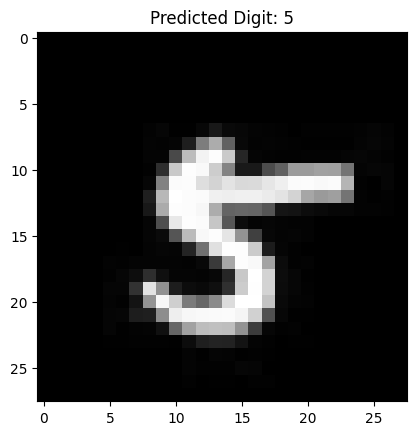

In [15]:
# Test with custom image (replace 'digit.png' with your image path)
custom_img = preprocess_image('digit5.png')
prediction = model.predict(custom_img)
predicted_class = np.argmax(prediction, axis=1)[0]
plt.imshow(custom_img.reshape(28, 28), cmap='gray')
plt.title(f'Predicted Digit: {predicted_class}')
plt.show()